# Importing Libraries:

In [20]:
!pip install numpy pandas scikit-learn category-encoders keras tensorflow xgboost matplotlib

In [21]:
import numpy as np
import pandas as pd
import os


# for preprocessing the data:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.model_selection import train_test_split

# importing the neural network libraries:
from keras.optimizers import *
from keras.losses import binary_crossentropy
from keras.models import Sequential
from keras.layers import Dense

# importing a classifier from xgboost:
from xgboost import XGBClassifier

# importing metrics to measure our accuracy:
from sklearn.metrics import accuracy_score

# Preprocessing the Data:

Reading the data:

## Download Data from Google Drive (For Colab)

Run this cell to download the dataset from Google Drive public folder:

In [22]:
import os
import gdown

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Google Drive folder ID from your public link
folder_id = '1L9fYSeqVvuB6Gz2ZgOLDGDyZ091B9S7V'

# Download the entire folder
gdown.download_folder(
    id=folder_id,
    output='data/',
    quiet=False,
    use_cookies=False
)

print("✅ Data downloaded successfully!")
print("Files in data directory:", os.listdir('data'))

Retrieving folder contents


Retrieving folder contents


Processing file 1KBSx63nQRnNet9kGNX677BElN3L2FT7x tic-tac-toe.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1KBSx63nQRnNet9kGNX677BElN3L2FT7x
To: /content/data/data/tic-tac-toe.csv
Downloading...
From: https://drive.google.com/uc?id=1KBSx63nQRnNet9kGNX677BElN3L2FT7x
To: /content/data/data/tic-tac-toe.csv
100%|██████████| 23.4k/23.4k [00:00<00:00, 48.2MB/s]

Retrieving folder contents


Processing file 1KBSx63nQRnNet9kGNX677BElN3L2FT7x tic-tac-toe.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1KBSx63nQRnNet9kGNX677BElN3L2FT7x
To: /content/data/data/tic-tac-toe.csv
Downloading...
From: https://drive.google.com/uc?id=1KBSx63nQRnNet9kGNX677BElN3L2FT7x
To: /content/data/data/tic-tac-toe.csv
100%|██████████| 23.4k/23.4k [00:00<00:00, 48.2MB/s]

✅ Data downloaded successfully!
Files in data directory: ['data']



Download completed


In [23]:
# Load the dataset
# Will work after downloading from Google Drive or if running locally

import os

# Try different possible paths (including nested structure from gdown)
paths_to_try = [
    "data/tic-tac-toe.csv",
    "data/data/tic-tac-toe.csv",  # gdown creates nested folder
    "data/tic-tac-toe.data.csv",
    "tic-tac-toe.csv",
]

data = None
for path in paths_to_try:
    if os.path.exists(path):
        print(f"✅ Loading data from: {path}")
        data = pd.read_csv(path)
        break

if data is not None:
    display(data.head())
else:
    print("❌ Dataset not found!")
    print("Please run the download cell above first.")
    print(f"\nDebug: Current directory: {os.getcwd()}")
    print("Available files in 'data' directory:")
    if os.path.exists('data'):
        for root, dirs, files in os.walk('data'):
            for file in files:
                print(f"  {os.path.join(root, file)}")

✅ Loading data from: data/data/tic-tac-toe.csv


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


Checking if there are any NaN values:

In [24]:
data.isnull().sum()

,0
TL,0
TM,0
TR,0
ML,0
MM,0
MR,0
BL,0
BM,0
BR,0
class,0


Defining the labels to predict on:

In [25]:
y = data['class']
data.drop(['class'], inplace=True, axis=1)

Encoding the labels or converting them to numerical form since categorical values cannot be used in algorithms:

In [26]:
label = LabelEncoder()

y = label.fit_transform(y)

In [27]:
cbe = CatBoostEncoder()
data = cbe.fit_transform(data, y)

Dividing the dataset into training and test sets:

In [28]:
train, test, ytrain, ytest = train_test_split(data, y,
                                              test_size=0.4, train_size=0.6)

# Training and Predicting:

In [29]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(9,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='Adam')

In [31]:
model.fit(train, ytrain, epochs=40,
          validation_data=(test, ytest))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6150 - loss: 0.6522 - val_accuracy: 0.6667 - val_loss: 0.5978
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6150 - loss: 0.6522 - val_accuracy: 0.6667 - val_loss: 0.5978
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6433 - loss: 0.6245 - val_accuracy: 0.6667 - val_loss: 0.5942
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6433 - loss: 0.6245 - val_accuracy: 0.6667 - val_loss: 0.5942
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6693 - loss: 0.5938 - val_accuracy: 0.6667 - val_loss: 0.5901
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6693 - loss: 0.5938 - val_accuracy: 0.6667 - val_loss: 0.5901
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6493 - loss: 0.6048 - val_accuracy: 0.6667 - val_loss: 0.5767
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6493 - loss: 0.6048 - val_accuracy: 0.6667 - val_los

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6150 - loss: 0.6522 - val_accuracy: 0.6667 - val_loss: 0.5978
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6150 - loss: 0.6522 - val_accuracy: 0.6667 - val_loss: 0.5978
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6433 - loss: 0.6245 - val_accuracy: 0.6667 - val_loss: 0.5942
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6433 - loss: 0.6245 - val_accuracy: 0.6667 - val_loss: 0.5942
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6693 - loss: 0.5938 - val_accuracy: 0.6667 - val_loss: 0.5901
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6693 - loss: 0.5938 - val_accuracy: 0.6667 - val_loss: 0.5901
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6493 - loss: 0.6048 - val_accuracy: 0.6667 - val_loss: 0.5767
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6493 - loss: 0.6048 - val_accuracy: 0.6667 - val_los

Concluding with fitting the neural network, I can say that it is good but we can do better since in my opinion a 1000 examples aren't exactly enough to train a plain artificial neural network with and get tinkerable results (pardon me if I am wrong I am new to this too!). The accuracy we got is almost 95% on the training set while the accuracy on the test set is 96% .

Lets try predicting with XGBoost Classifier now:

In [32]:
xg = XGBClassifier(n_estimators=350)

xg.fit(train, ytrain)

xgPreds = xg.predict(test)

In [33]:
accuracy_score(xgPreds, ytest)

0.9817708333333334

# Model Export and Saving

Now let's save our trained models and encoders for future use without retraining!

In [34]:
# Import pickle for saving Python objects
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the Neural Network model
model.save('models/neural_network_model.h5')
print("✅ Neural Network model saved to: models/neural_network_model.h5")

# Save the XGBoost model
with open('models/xgboost_model.pkl', 'wb') as f:
    pickle.dump(xg, f)
print("✅ XGBoost model saved to: models/xgboost_model.pkl")

# Save the Label Encoder
with open('models/label_encoder.pkl', 'wb') as f:
    pickle.dump(label, f)
print("✅ Label Encoder saved to: models/label_encoder.pkl")

# Save the CatBoost Encoder
with open('models/catboost_encoder.pkl', 'wb') as f:
    pickle.dump(cbe, f)
print("✅ CatBoost Encoder saved to: models/catboost_encoder.pkl")

✅ Neural Network model saved to: models/neural_network_model.h5
✅ XGBoost model saved to: models/xgboost_model.pkl
✅ Label Encoder saved to: models/label_encoder.pkl
✅ CatBoost Encoder saved to: models/catboost_encoder.pkl


In [ ]:
# Download models folder to local machine (for Colab)
try:
    from google.colab import files
    import os
    
    print("\n📥 Downloading model files to your local machine...")
    
    # Download all model files
    model_files = [
        'models/neural_network_model.h5',
        'models/xgboost_model.pkl',
        'models/label_encoder.pkl',
        'models/catboost_encoder.pkl'
    ]
    
    for file_path in model_files:
        if os.path.exists(file_path):
            files.download(file_path)
            print(f"✅ Downloaded: {file_path}")
        else:
            print(f"⚠️  File not found: {file_path}")
    
    print("✅ All model files downloaded successfully!")
    
except ImportError:
    print("ℹ️  Running locally - model files are already saved in 'models/' directory")
except Exception as e:
    print(f"⚠️  Could not auto-download: {e}")
    print("💡 Manually download files from the Files panel on the left sidebar")

## How to Load the Models Later

Here's how you can load these saved models in other projects:

In [35]:
# Example code to load the saved models
from keras.models import load_model
import pickle

# Load Neural Network
# loaded_nn_model = load_model('models/neural_network_model.h5')

# Load XGBoost model
# with open('models/xgboost_model.pkl', 'rb') as f:
#     loaded_xgb_model = pickle.load(f)

# Load Label Encoder
# with open('models/label_encoder.pkl', 'rb') as f:
#     loaded_label_encoder = pickle.load(f)

# Load CatBoost Encoder
# with open('models/catboost_encoder.pkl', 'rb') as f:
#     loaded_catboost_encoder = pickle.load(f)

print("💡 Use the code above (uncommented) to load models in new projects!")
print("📁 All models are saved in the 'models/' directory")

💡 Use the code above (uncommented) to load models in new projects!
📁 All models are saved in the 'models/' directory


## Model Evaluation: Confusion Matrix & Metrics

To better evaluate your classification model, it's recommended to use a confusion matrix and additional metrics such as precision, recall, and F1-score. These provide deeper insight into model performance beyond accuracy.

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set using the neural network
nn_preds = (model.predict(test) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(ytest, nn_preds)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(ytest, nn_preds)
print("Classification Report:\n", cr)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Confusion Matrix:
 [[122   6]
 [  6 250]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.98      0.98      0.98       256

    accuracy                           0.97       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.97      0.97      0.97       384

Confusion Matrix:
 [[122   6]
 [  6 250]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.98      0.98      0.98       256

    accuracy                           0.97       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.97      0.97      0.97       384



## Visualizing Training Curves and Metrics

To further evaluate your model, it's useful to plot the training loss and accuracy curves, as well as review precision, recall, and F1-score from the classification report above.

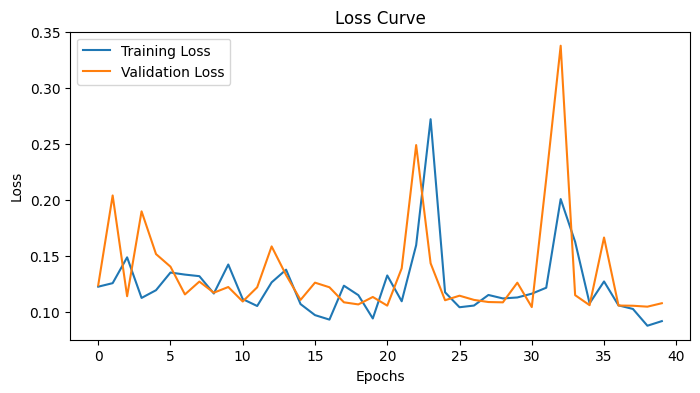

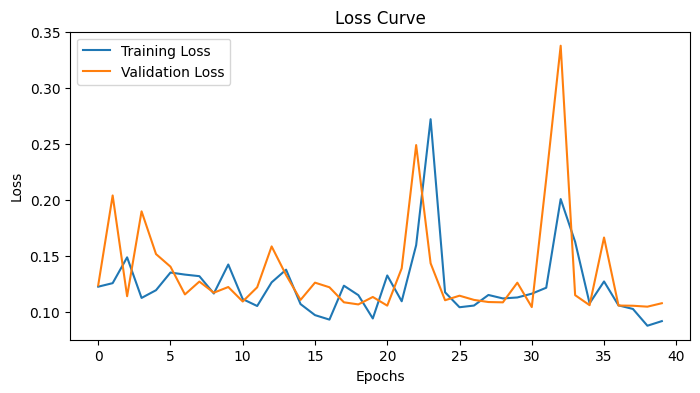

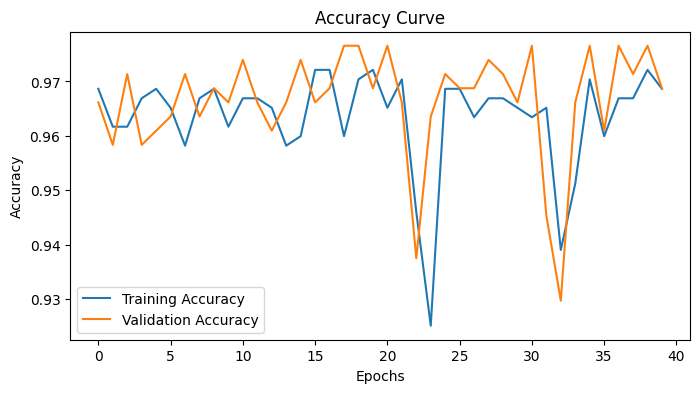

In [37]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(train, ytrain, epochs=40, validation_data=(test, ytest), verbose=0)

# Plot Loss Curve
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# Display the architecture of the neural network model
model.summary()

Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,109 (660.59 KB)

 Trainable params: 56,369 (220.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 112,740 (440.39 KB)

In [39]:
# Show detailed layer info including activation functions
for i, layer in enumerate(model.layers):
    config = layer.get_config()
    print(f"Layer {i+1}: {layer.__class__.__name__}")
    print(f"  Units: {config.get('units', '-')}")
    print(f"  Activation: {config.get('activation', '-')}")
    print(f"  Input shape: {layer.input_shape if hasattr(layer, 'input_shape') else '-'}")
    print('-'*40)

Layer 1: Dense
  Units: 256
  Activation: relu
  Input shape: -
----------------------------------------
Layer 2: Dense
  Units: 128
  Activation: relu
  Input shape: -
----------------------------------------
Layer 3: Dense
  Units: 128
  Activation: relu
  Input shape: -
----------------------------------------
Layer 4: Dense
  Units: 32
  Activation: relu
  Input shape: -
----------------------------------------
Layer 5: Dense
  Units: 8
  Activation: relu
  Input shape: -
----------------------------------------
Layer 6: Dense
  Units: 1
  Activation: sigmoid
  Input shape: -
----------------------------------------


In [ ]:
# Save training curves and metrics plots to PDF
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the model and save the history
history = model.fit(train, ytrain, epochs=40, validation_data=(test, ytest), verbose=0)

# Plot Loss Curve
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('training_loss_curve.pdf')
plt.close()

# Plot Accuracy Curve
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('training_accuracy_curve.pdf')
plt.close()

# Confusion Matrix
nn_preds = (model.predict(test) > 0.5).astype(int)
cm = confusion_matrix(ytest, nn_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.pdf')
plt.close()

print("✅ PDF files generated: training_loss_curve.pdf, training_accuracy_curve.pdf, confusion_matrix.pdf")

# Download PDF files to local machine (for Colab)
try:
    from google.colab import files
    import os
    
    print("\n📥 Downloading PDF files to your local machine...")
    
    # Download all PDF files
    pdf_files = [
        'training_loss_curve.pdf',
        'training_accuracy_curve.pdf',
        'confusion_matrix.pdf'
    ]
    
    for file_path in pdf_files:
        if os.path.exists(file_path):
            files.download(file_path)
            print(f"✅ Downloaded: {file_path}")
        else:
            print(f"⚠️  File not found: {file_path}")
    
    print("✅ All PDF files downloaded successfully!")
    
except ImportError:
    print("ℹ️  Running locally - PDF files are already saved in current directory")
except Exception as e:
    print(f"⚠️  Could not auto-download: {e}")
    print("💡 Manually download files from the Files panel on the left sidebar")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
✅ PDF files generated: training_loss_curve.pdf, training_accuracy_curve.pdf, confusion_matrix.pdf
✅ PDF files generated: training_loss_curve.pdf, training_accuracy_curve.pdf, confusion_matrix.pdf
